# Finding a Pupil in an Image, using *Scikit-Image (skimage)*

FindPupil demonstrates how *skimage* can be used to find the pupil in an image
of the eye. 
To run, the file `eye.bmp` is required.

The following steps are included:

- Converting the image to grayscale
- Calculating and showing the histogram
- Interactively setting the threshold for b/w conversion
- Filling holes
- Opening the image
- Fitting an edge to the pupil


In [34]:
'''Find the pupil-edge in an image of the eye, using sckits-image

Author: Thomas Haslwanter
Date:   May-2016
Ver:    2.0

'''

# Import standard modules
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import os

# Modules for reading in an image from the web
import sys
if sys.version[0] == '3':
    from urllib.request import urlopen
    from io import BytesIO
else:
    from urllib2 import urlopen
    from StringIO import StringIO
    print('Working with Python 2')

import PIL

# Modules for image processing
import skimage 
from skimage.morphology import disk
from skimage import filters
from scipy import ndimage

In [35]:
# Function to quickly show images in graylevel
plt.set_cmap('gray')

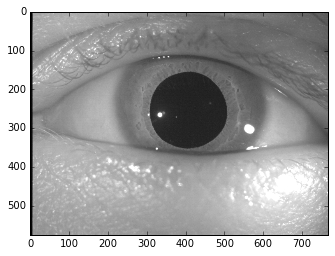

In [36]:
'''Get the data
This is a bit complicated, because I have two options:
- locally, or from the Web
- Python 2, or Python 3 (different handling of URLs, and of strings/bytes)
'''

fromWeb = False
if fromWeb:
    url = 'http://work.thaslwanter.at/CSS/Code/0_5.bmp'
    if sys.version[0] == 3:        
        file = BytesIO(urlopen(url).read())        
    else:
        file = StringIO(urlopen(url).read())        
    data = np.array(PIL.Image.open(file))
else:
    data = plt.imread('data\images\eye.bmp')
    
plt.imshow(data)

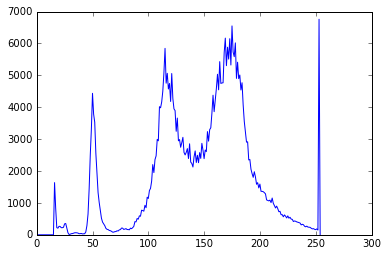

In [37]:
# Calculate and show the histogram
histo = np.histogram(data, bins=np.arange(0,256))
# Note the number of data is one less than the number of box-edges for the histogram
plt.plot(histo[1][:-1], histo[0])

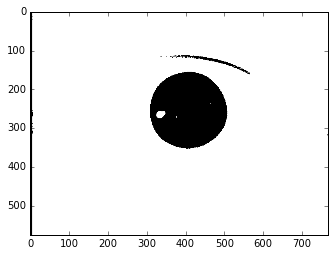

In [38]:
# Convert to black-and-white
# for convenience, I choose the threshold automatically
bw = data>80
plt.imshow(bw)

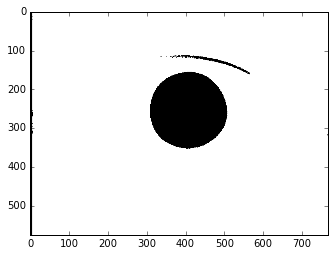

In [39]:
# Fill the holes
filled = np.invert(ndimage.binary_fill_holes(np.invert(bw)))
plt.imshow(filled)

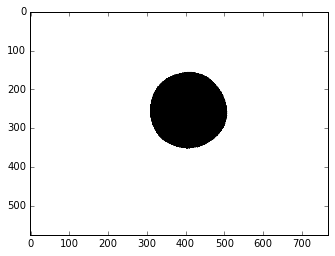

In [40]:
se = disk(10)
closed = skimage.morphology.closing(filled, se)
plt.imshow(closed)

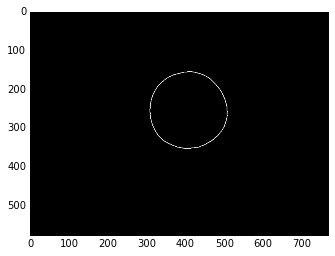

In [41]:
edges = filters.sobel(closed)
plt.imshow(edges)

[ImgProc_3a_FindPupil_OpenCV](ImgProc_3a_FindPupil_OpenCV.ipynb)<img src="data/images/Backward.png" align="middle"> 


    Author: Thomas Haslwanter
    Date: May 9, 2016
    Ver: 2.0

<img src="data/images/CCA_40.png">
*Auditory Sound Processing*  is licensed under a Creative Commons Attribution 4.0 International License.